# Overview

Regression analysis is a way of mathematically sorting out which factors (independent variables) have an impact on something you're trying to understand or predict (dependant variable), how they interact with each other and how certain this relationship is. 

# Brief

In this project, you will create a model that predicts the happiness level of a country based on alcohol (beer) consumption.

# Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
%matplotlib inline

# Import data

In [2]:
df = pd.read_csv('./datasets/happiness_and_alcohol_data.csv')
df.shape

(122, 9)

In [3]:
df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Senegal,Sub-Saharan Africa,north,4.219,499,0.953,9,1,7
1,Tanzania,Sub-Saharan Africa,south,3.666,533,0.878,36,6,1
2,Benin,Sub-Saharan Africa,north,3.484,512,0.789,34,4,13
3,Mali,Sub-Saharan Africa,north,4.073,421,0.780,5,1,1
4,Comoros,Sub-Saharan Africa,south,3.956,502,0.775,1,3,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
Country             122 non-null object
Region              122 non-null object
Hemisphere          122 non-null object
HappinessScore      122 non-null float64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null float64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


In [7]:
df.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,15.689852,137.565574,96.598361,66.598361
std,1.148736,149.846124,19.841803,104.817353,81.435028,88.121503
min,3.069000,351.000000,0.300000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,2.233250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,6.591500,125.500000,82.500000,16.000000
75%,6.477000,861.500000,19.525000,224.750000,142.500000,112.750000
max,7.526000,951.000000,100.739000,376.000000,373.000000,370.000000


# Columns description

**Country**: Name of the country<BR>
**Region**: Region the country belongs to<BR>
**Hemisphere**: Hemisphere** of country<BR>
**HappinessScore**: A metric measured in 2016 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest"<BR>
**HDI**: Human Development Index by United Nations Development Programme<BR>
**GDP_PerCapitaGross**: Domestic Product index<BR>
**Beer_PerCapita**: Liters ( per capita ) of beer consumption<BR>
**Spirit_PerCapita**: Consumption of spirits drink ( per capita )<BR>
**Wine_PerCapita**: Wine consumption<BR>


# Explore and transform

In [39]:
# check categorical data consistency
sorted(df['Hemisphere'].unique())

['both', 'north', 'noth', 'south']

In [40]:
# replace 'noth' with 'north'
df.Hemisphere.replace(['noth'], ['north'], inplace=True)
sorted(df['Hemisphere'].unique())

['both', 'north', 'south']

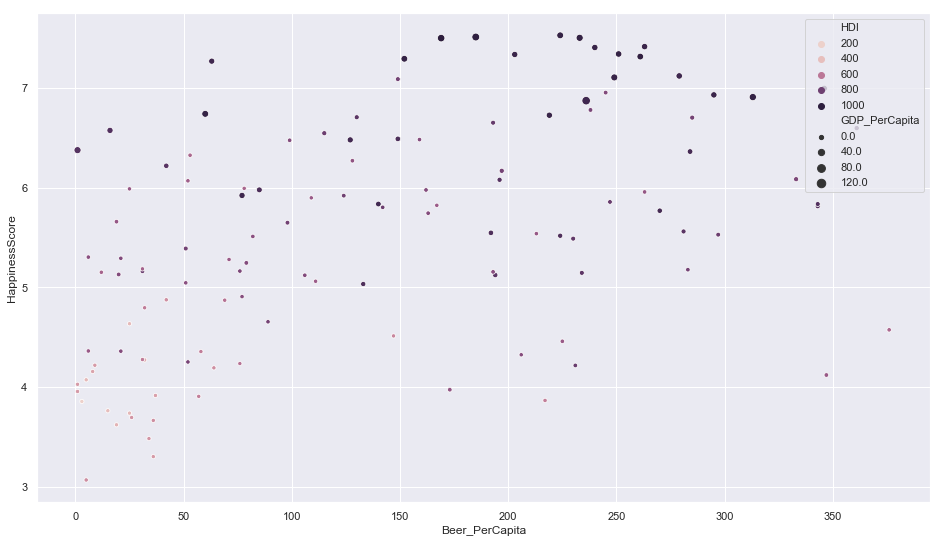

In [18]:
sns.set(rc={'figure.figsize':(16,9)})
sns.scatterplot(x='Beer_PerCapita', y='HappinessScore', data=df, hue='HDI', size='GDP_PerCapita')

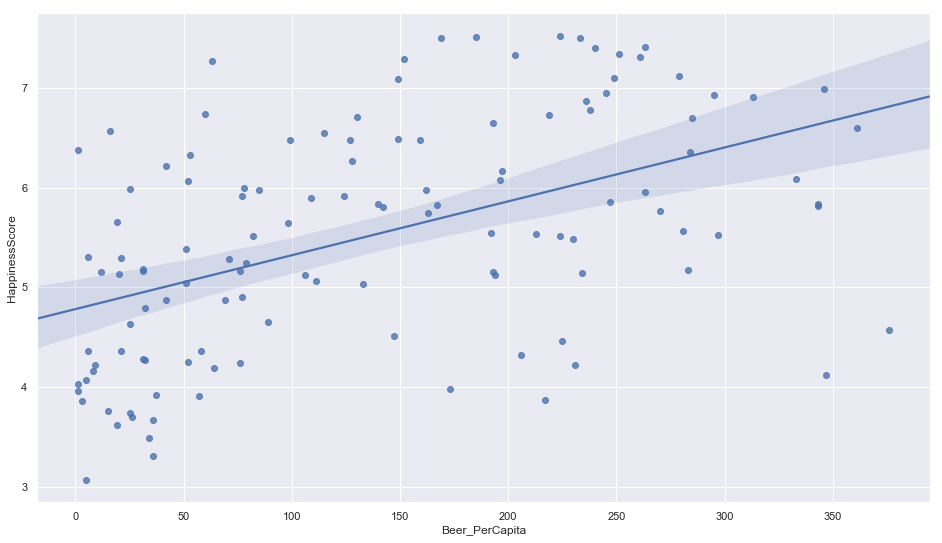

In [29]:
sns.regplot(x="Beer_PerCapita", y="HappinessScore", data=df)

**The relationship between Happiness Score and Beer Per Capita doesn't seem to be linear.**

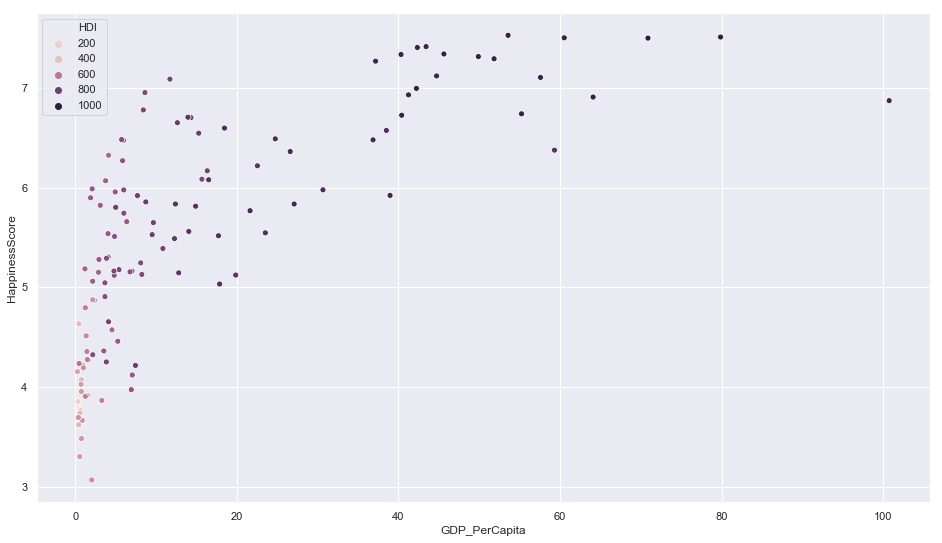

In [19]:
sns.set(rc={'figure.figsize':(16,9)})
sns.scatterplot(x='GDP_PerCapita', y='HappinessScore', data=df, hue='HDI')

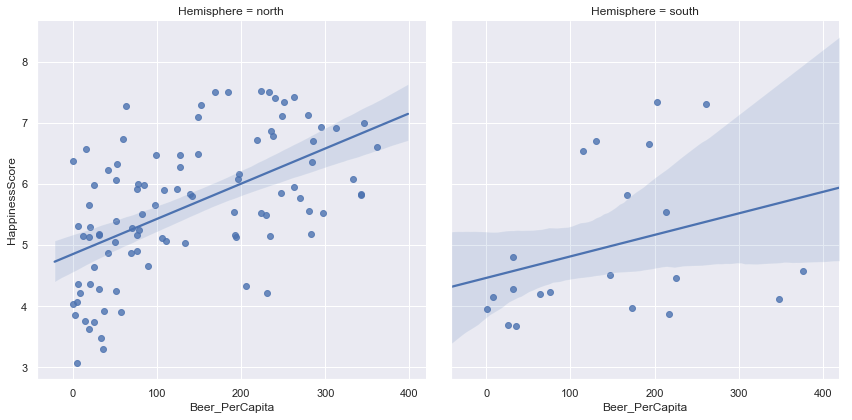

In [44]:
sns.lmplot(x="Beer_PerCapita", y="HappinessScore", col="Hemisphere", data=df.loc[df.Hemisphere!='both'], height=6, aspect=1, x_jitter=.1)

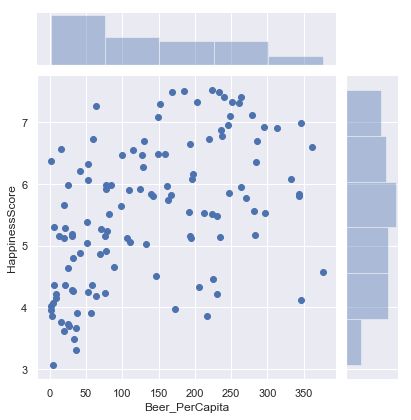

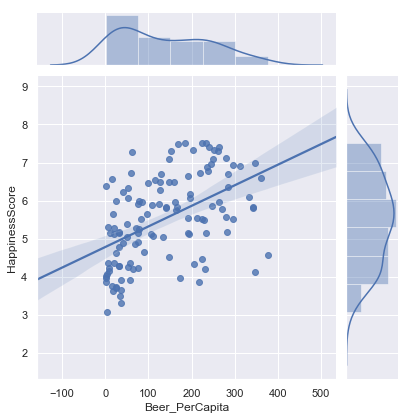

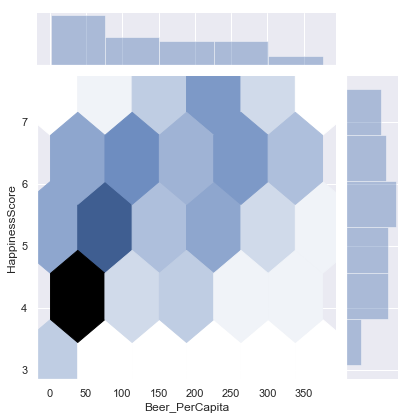

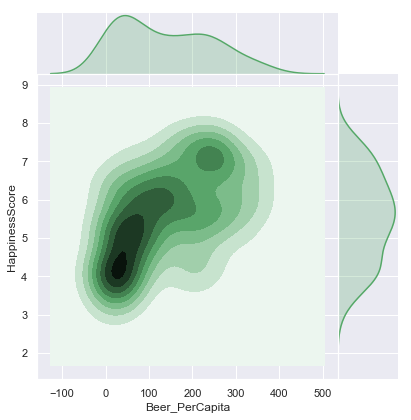

In [74]:
sns.jointplot(x="Beer_PerCapita", y="HappinessScore", data=df)
sns.jointplot(x="Beer_PerCapita", y="HappinessScore", data=df, kind="reg")
sns.jointplot("Beer_PerCapita", "HappinessScore", data=df, kind="hex")
sns.jointplot("Beer_PerCapita", "HappinessScore", data=df, kind="kde", space=0, color="g")

# Build model

## Univariate Linear Model

In [75]:
# let's statistically analyse how well a linear relationship suits the data above (Beer_PerCapita vs HappinessScore)
df.corr()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.815163,0.721962,0.493367,0.256399,0.450589
HDI,0.815163,1.000000,0.712325,0.588394,0.393413,0.602561
GDP_PerCapita,0.721962,0.712325,1.000000,0.389962,0.079701,0.585861
Beer_PerCapita,0.493367,0.588394,0.389962,1.000000,0.364855,0.474274
Spirit_PerCapita,0.256399,0.393413,0.079701,0.364855,1.000000,0.118718
Wine_PerCapita,0.450589,0.602561,0.585861,0.474274,0.118718,1.000000


**We can see that the correlation coefficient between Beer_PerCapita and HappinessScore is positive denoting that an increase in beer consumption will reflect an increase in the happiness score.**

In [126]:
# let's split our dataset into train and test sets.
x = df[['Beer_PerCapita']]
y = df[['HappinessScore']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1234)
print('x_train.shape: {}, y_train.shape: {}, x_test.shape: {}, y_test.shape: {}'.
      format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train.shape: (91, 1), y_train.shape: (91, 1), x_test.shape: (31, 1), y_test.shape: (31, 1)


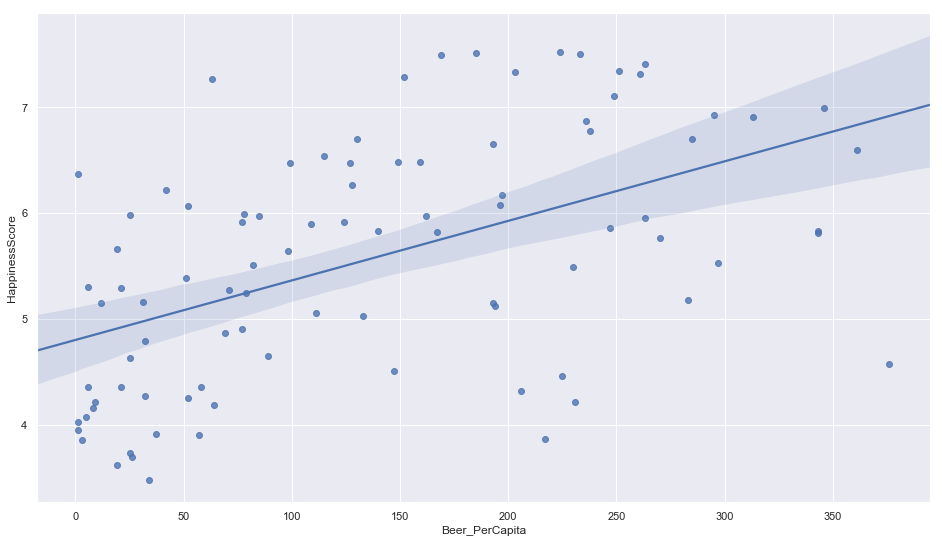

In [127]:
# re-plot beer consumption against happiness score with the training data.
sns.regplot(x="Beer_PerCapita", y="HappinessScore", data=pd.concat([x_train, y_train], axis=1))

In [128]:
# create our linear regression model
regression_model = linear_model.LinearRegression()

#fit our model
regression_model = regression_model.fit(x_train, y_train)

In [129]:
# evaluate the R^2, the intercept and X1-coefficients
r2_ = regression_model.score(x_train, y_train)
x1_coeff = regression_model.coef_
intercept = regression_model.intercept_
print('R-squared: {}, X1 coeff: {}, intercept: {}'.format(r2_, x1_coeff, intercept))

R-squared: 0.26736627936575263, X1 coeff: [[0.00562397]], intercept: [4.80313091]


R-squared is the proportion of the explained variation divided by the total variation. In other words, if the R-squared is close to one then it means that the model (in this case the beer consumption) explains the variation in happiness score around the globe.

**However, in this case the R2 is only 0.27, which means that only 27% of the variation in the happiness score around the globe is explained by beer consumption.**

Additionally, the coefficient 0.0056 means that for every extra litre of beer consumed per capita, the happiness score only increases by 0.0056 units - maybe beer consumption is not such a good indicator of the happiness score after all!

In [130]:
# let's evaluate the accuracy of our model
# first let's make predictions for the test data
y_pred = regression_model.predict(x_test)
# let's convert y_pred to a dataframe object
y_pred = pd.DataFrame(y_pred)
y_pred.shape

(31, 1)

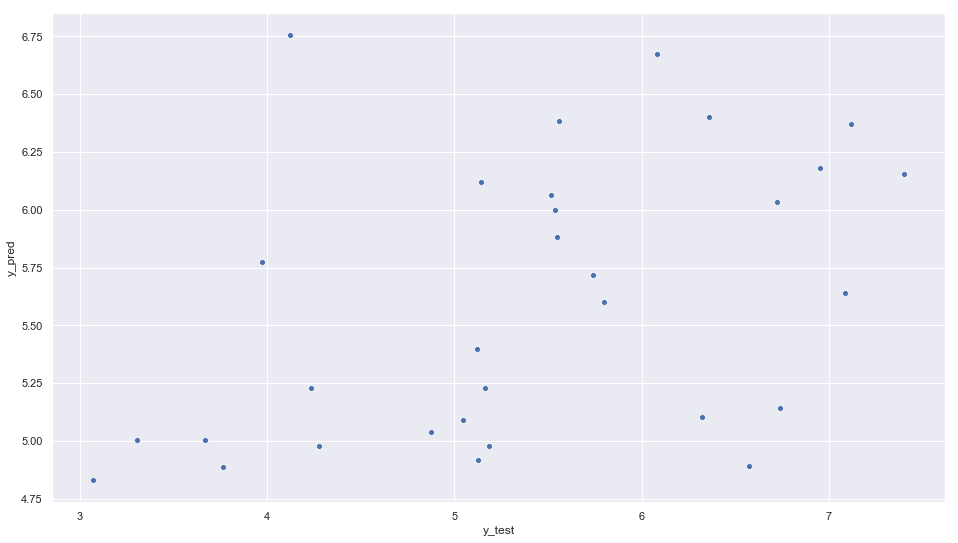

In [131]:
# let's plot a graph showing the relationship between the observed and predicted happiness score
y_test = y_test['HappinessScore'].reset_index()
y_obs_pred = pd.concat([y_test['HappinessScore'], y_pred], axis=1)
y_obs_pred.columns = ['y_test', 'y_pred']
y_obs_pred['diff']= y_obs_pred['y_test'] - y_obs_pred['y_pred']
r = sns.scatterplot(x='y_test', y = 'y_pred', data=y_obs_pred)

You will expect the distribution of the predictions and the test data to be relatively linear if the model is performing well - **a "perfect" model will be a line with slope = 1 and intercept = 0.**

**This is not the case here**, but the scatter plot does show a relatively linear distribution. Perhaps beer consumption is not the best indicator of happiness score, as we see based on the R-squared and coefficient.

### Root Mean Square Error (RMSE)

In [132]:
# let's compute RMSE for our test data
diff = y_obs_pred['y_pred']-y_obs_pred['y_test']
diff_sq = diff**2
mean_diff_sq = diff_sq.mean()
RMSE = np.sqrt(mean_diff_sq)
RMSE

1.0735824496908455

This is the standard deviation of the residuals, and in this case is relatively small. 

**This result is not expected because we saw previously that beer consumption only explains 17% of the variance of the data!**

In [133]:
# let's compute RMSE for our train data
y_pred_train = pd.DataFrame(regression_model.predict(x_train))
y_train_2 = y_train['HappinessScore'].reset_index()
y_obs_pred_train = pd.concat([y_train_2['HappinessScore'], y_pred_train], axis=1)
y_obs_pred_train.columns = ['y_test_train', 'y_pred_train']
y_obs_pred_train['diff']= y_obs_pred_train['y_test_train'] - y_obs_pred_train['y_pred_train']
diff = y_obs_pred_train['y_pred_train'] - y_obs_pred_train['y_test_train']
diff_sq = diff**2
mean_diff_sq = diff_sq.mean()
RMSE = np.sqrt(mean_diff_sq)
RMSE

0.9691240992903604

In a good model, the RMSE should be close for both your testing data and your training data.

If the RMSE for your testing data is higher than the training data, there is a high chance that your model overfit. In other words, your model performed worse during testing than training.

**In our case RMSE for train and test data are pretty close, meaning our model didn't overfit the train data.**

### Significance of the model - optional

It is important to evaluate how significant the results of our model are when compared to those from a random model. For example, in the case of a single independent variable the model that we are running has the form of: Y = β0 + β1X1

A random model will have the the following form: Y = β0

The null hypothesis is that our model is not different from a random model - we hope to reject that hypothesis!

To test whether our linear model is significantly different from a random model or not we need to calculate the p-value.

The easiest way is using ordinary least squares from the library StatsModels.

In [134]:
# Fit regression model using ordinary least squares (OLS)
regression_model = smf.ols('HappinessScore ~ Beer_PerCapita', data=pd.concat([x_train, y_train], axis=1)).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         HappinessScore   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     32.48
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           1.54e-07
Time:                        16:30:54   Log-Likelihood:                -126.27
No. Observations:                  91   AIC:                             256.5
Df Residuals:                      89   BIC:                             261.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.8031      0.169     28.

The p-value is less than 0.001, so if our significance level was 0.05 then we would reject the null hypothesis, and therefore the model is statistically significant AND explains 17% of the variance of the happiness score!

## Multivariate Linear Model

### Evaluating correlation between all the variables in the model

[Text(0, 0.5, 'HappinessScore'),
 Text(0, 1.5, 'HDI'),
 Text(0, 2.5, 'GDP_PerCapita'),
 Text(0, 3.5, 'Beer_PerCapita'),
 Text(0, 4.5, 'Spirit_PerCapita'),
 Text(0, 5.5, 'Wine_PerCapita')]

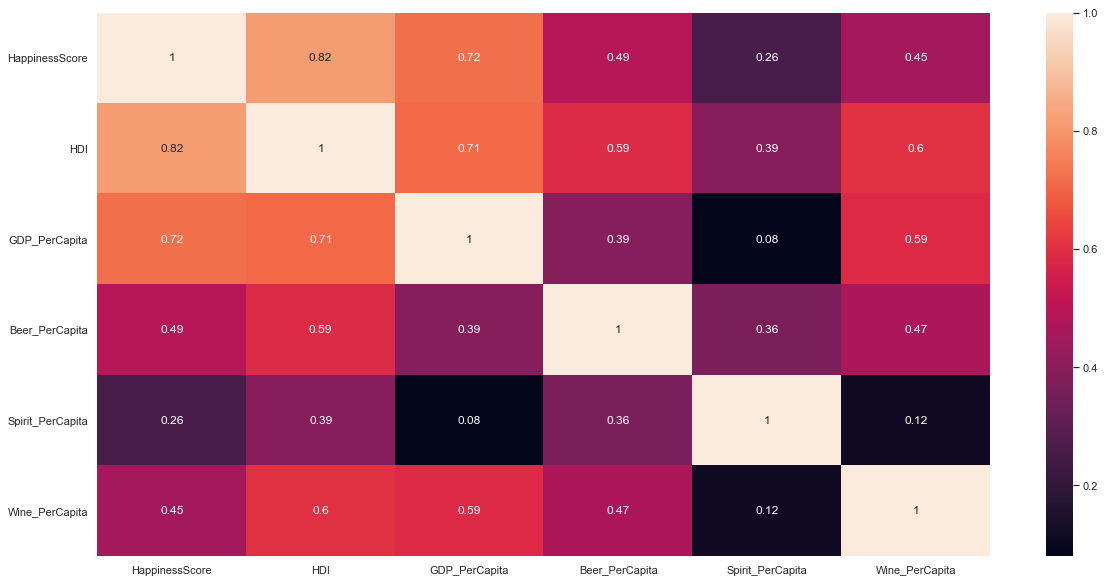

In [150]:
# let's analyse the correlation between variables in the dataset
plt.figure(figsize=(20, 10))
g = sns.heatmap(df.corr(),  annot=True)
g.set_yticklabels(g.get_yticklabels(), rotation=0)

**HDI** (Human Development Index by United Nations Development Programme) is clearly **highly correlated** with **HappinessScore**.

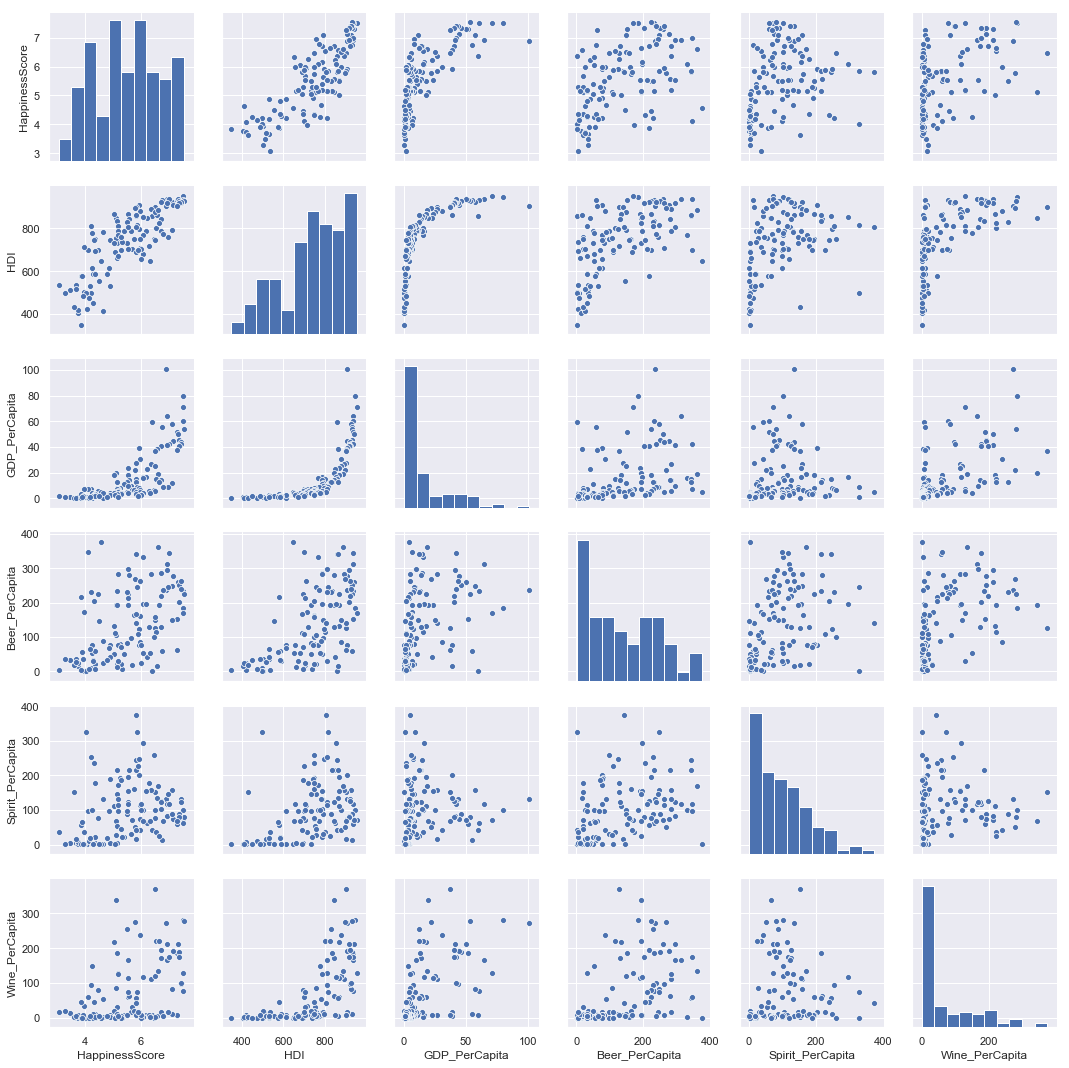

In [155]:
# let's validate this by plotting a pairwise scatter plots
sns.pairplot(df)

HDI and HappinessScore seems indeed clearly linearly correlated.

In [154]:
# last but not least we can look at the actual pairwise correlation coefficients
df.corr()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
HappinessScore,1.000000,0.815163,0.721962,0.493367,0.256399,0.450589
HDI,0.815163,1.000000,0.712325,0.588394,0.393413,0.602561
GDP_PerCapita,0.721962,0.712325,1.000000,0.389962,0.079701,0.585861
Beer_PerCapita,0.493367,0.588394,0.389962,1.000000,0.364855,0.474274
Spirit_PerCapita,0.256399,0.393413,0.079701,0.364855,1.000000,0.118718
Wine_PerCapita,0.450589,0.602561,0.585861,0.474274,0.118718,1.000000


In [194]:
# let's split our dataset into train and test sets.
x = df[['HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']]
y = df[['HappinessScore']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1234)
print('x_train.shape: {}, y_train.shape: {}, x_test.shape: {}, y_test.shape: {}'.
      format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train.shape: (91, 5), y_train.shape: (91, 1), x_test.shape: (31, 5), y_test.shape: (31, 1)


In [195]:
# create our linear regression model
regression_model = linear_model.LinearRegression()

#fit our model
regression_model = regression_model.fit(x_train, y_train)

In [196]:
# evaluate the R^2, the intercept and X1-coefficients
r2_ = regression_model.score(x_train, y_train)
x1_coeff = regression_model.coef_
intercept = regression_model.intercept_
print('R-squared: {}, X1 coeff: {}, intercept: {}'.format(r2_, x1_coeff, intercept))

R-squared: 0.7459722554394038, X1 coeff: [[ 0.00487094  0.01830154  0.00090244 -0.00085964 -0.0019583 ]], intercept: [1.75642152]


In this case the R2 is 0.75, which means that 75% of the variation in the happiness score around the globe is explained by all of our factors.

**So the multivariate linear model represents a huge improvement** compared to our univariate model.

Additionally, the coefficient 0.01830154 for GDP_PerCapita is the highest of the coefficients, meaning that GDP_PerCapita is a more important indicator of the happiness score compared to the others!

### Significance of the model

In [197]:
# Fit regression model using ordinary least squares (OLS)
regression_model = smf.ols('HappinessScore ~ HDI + GDP_PerCapita + Beer_PerCapita + Spirit_PerCapita + Wine_PerCapita',
                           data=pd.concat([x_train, y_train], axis=1)).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:         HappinessScore   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     49.92
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           7.23e-24
Time:                        17:52:37   Log-Likelihood:                -78.076
No. Observations:                  91   AIC:                             168.2
Df Residuals:                      85   BIC:                             183.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7564      0.422  

The p-values in this case are going to tell us which variables will be important to consider.

For example, the p-value of beer consumption and spirit consumption indicate that these variables are not adding much value to the model. 

Why not try to run a model with only those variables that have a p-value lower than 0.01?



### Accuracy of the model

In [198]:
# let's evaluate the accuracy of our model
# first let's make predictions for the test data
y_pred = regression_model.predict(x_test)
# let's convert y_pred to a dataframe object
y_pred = pd.DataFrame(y_pred)
y_pred.shape

(31, 1)

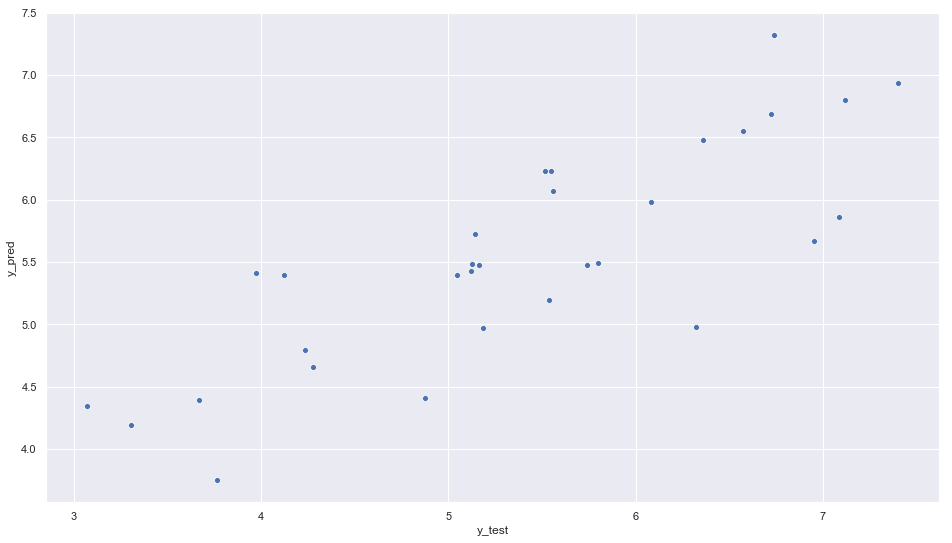

In [199]:
# let's plot a graph showing the relationship between the observed and predicted happiness score
y_obs_pred = pd.concat([y_test['HappinessScore'], y_pred], axis=1)
y_obs_pred.columns = ['y_test', 'y_pred']
y_obs_pred['diff']= y_obs_pred['y_test'] - y_obs_pred['y_pred']
r = sns.scatterplot(x='y_test', y = 'y_pred', data=y_obs_pred)

**The distribution of the predictions and the test data is relatively linear, proving that the model is performing reasonably well.**

### Root Mean Square Error (RMSE)

In [200]:
# let's compute RMSE for our test data
diff = y_obs_pred['y_pred']-y_obs_pred['y_test']
diff_sq = diff**2
mean_diff_sq = diff_sq.mean()
RMSE = np.sqrt(mean_diff_sq)
RMSE

0.7026615738848796

This is the standard deviation of the residuals, and in this case is relatively small.

**It is even smaller than the model which only included beer consumption!**

In [201]:
# let's compute RMSE for our train data
y_pred_train = pd.DataFrame(regression_model.predict(x_train))
y_train_2 = y_train['HappinessScore'].reset_index()
y_obs_pred_train = pd.concat([y_train_2['HappinessScore'], y_pred_train], axis=1)
y_obs_pred_train.columns = ['y_test_train', 'y_pred_train']
y_obs_pred_train['diff']= y_obs_pred_train['y_test_train'] - y_obs_pred_train['y_pred_train']
diff = y_obs_pred_train['y_pred_train'] - y_obs_pred_train['y_test_train']
diff_sq = diff**2
mean_diff_sq = diff_sq.mean()
RMSE = np.sqrt(mean_diff_sq)
RMSE

1.6742138916016425

**RMSE for train and test data are pretty close (RMSE for test data is actually smaller than that of the train data), meaning our model didn't overfit the train data.**

To read:

https://towardsdatascience.com/5-types-of-regression-and-their-properties-c5e1fa12d55e
https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
